### 이상치
* 이상치
    - IQR의 1.5배 또는 3배의 차이가 나면 이상치라고 표현
    - 다른 데이터보다 아주 작거나 큰 값을 말한다
    - 데이터를 분석할 때 이상치는 의사결정에 영향을 미칠 수 있다
* 이상치 처리
    1. 제거
        - 오타, 오류, 비상식적 값들을 단순히 제거
    2. 치환
        - 평균, 최빈, 중앙값
* 이상치 구하기
    - 1/4 분위값 25%, 2/4분위값 50%(MEDIAN-중앙값), 3/4분위 75%
    - IQR = Q3(3사분위) - Q1(1사분위)
    - 최대 이상치 = Q3 + IQR * 1.5(3.0)
    - 최저 이상치 = Q1 - IQR * 1.5(3.0)

## 배달 시간 확인하기


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/food.csv')

In [3]:
df.mean()

food_a    47.407407
food_b    51.037037
food_c    42.407407
dtype: float64

In [4]:
df.describe()
# std = 표쥰편차 , 25% 지점 (Q1) , 75% 지점(Q3)

,food_a,food_b,food_c
count,27.000000,27.000000,27.000000
mean,47.407407,51.037037,42.407407
std,20.267935,110.789295,64.268822
min,20.000000,5.000000,5.000000
25%,38.000000,20.000000,20.000000
50%,46.000000,30.000000,31.000000
75%,57.000000,41.500000,45.500000
max,120.000000,600.000000,350.000000


### 중위수

In [5]:
import numpy as np
test_median = [1,2,3,4,5,6,7,8,9,10]
print('평균 : ', np.mean(test_median))
'중위수(중앙값) : ', np.median(test_median)

평균 :  5.5


('중위수(중앙값) : ', 5.5)

In [6]:
food_a_median = np.median(df['food_a'])
food_b_median = np.median(df['food_b'])
food_c_median = np.median(df['food_c'])

print('food_a : ', food_a_median)
print('food_b : ', food_b_median)
print('food_c : ', food_c_median)

food_a :  46.0
food_b :  30.0
food_c :  31.0


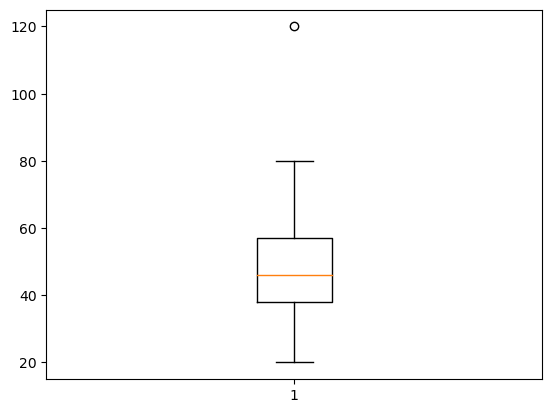

In [7]:
import matplotlib.pyplot as plt
plt.boxplot(df['food_a'])
plt.show()

### 이상치
* IQR = Q3 - Q1
* 최대 이상치 : Q3 + IQR * 1.5(3.0)
* 최저 이상치 : Q1 - IQR * 1.5(3.0)

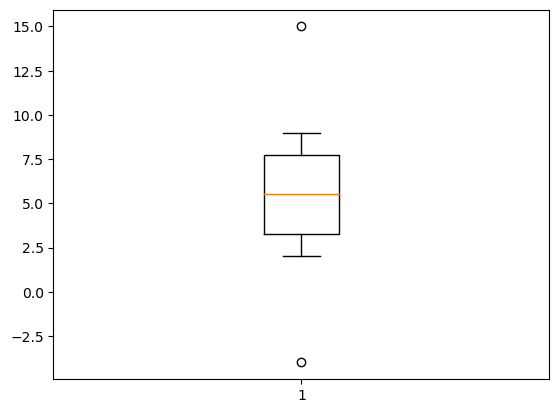

In [8]:
test_median = [-4,2,3,4,5,6,7,8,9,15]
df_test = pd.DataFrame(test_median)
plt.boxplot(df_test[0])
plt.show()

In [9]:
df_test.describe()

,0
count,10.000000
mean,5.500000
std,4.972145
min,-4.000000
25%,3.250000
50%,5.500000
75%,7.750000
max,15.000000


In [10]:
print( df_test.describe().loc['25%'] )
q1 = df_test[0].describe().loc['25%']
q3 = df_test[0].describe().loc['75%']
print(q1,q3)

0    3.25
Name: 25%, dtype: float64
3.25 7.75


In [11]:
iqr = q3 - q1
lowerfence = q1 - iqr * 1.5 #최저 이상치
upperfence = q3 + iqr * 1.5 #최대 이상치
print('최저 이상치 : ', lowerfence)
print('최대 이상치 : ', upperfence)

최저 이상치 :  -3.5
최대 이상치 :  14.5


0    False
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9    False
Name: 0, dtype: bool


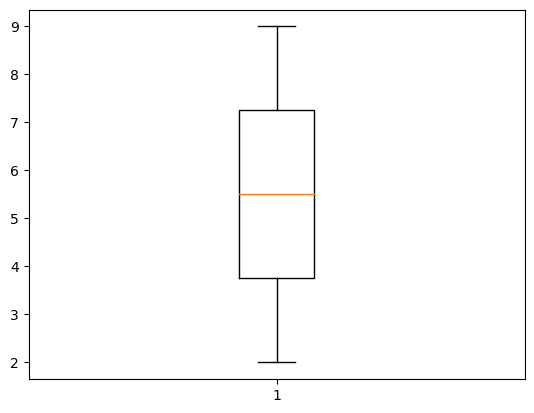

In [12]:
print( (df_test[0] >= lowerfence) & (df_test[0] <= upperfence) )
df_test[(df_test[0] >= lowerfence) & (df_test[0] <= upperfence)]
df_test = df_test[(df_test[0] >= lowerfence) & (df_test[0] <= upperfence)]
plt.boxplot(df_test[0])
plt.show()

### 이상치 치환
- 평균, 최빈값, 중앙값

In [13]:
df_test= pd.DataFrame(test_median)


In [14]:
df_test[(df_test[0]>upperfence) | (df_test[0] < lowerfence) ]\
                    = df_test[0].describe().loc['50%']
df_test

,0
0,5.5
1,2.0
2,3.0
3,4.0
4,5.0
5,6.0
6,7.0
7,8.0
8,9.0
9,5.5


In [15]:
df_test.reset_index( drop = True )

,0
0,5.5
1,2.0
2,3.0
3,4.0
4,5.0
5,6.0
6,7.0
7,8.0
8,9.0
9,5.5


In [16]:
df = pd.read_csv('data/food.csv')

In [17]:
df

,food_a,food_b,food_c
0,20,5,5
1,21,6,5
2,23,11,5
3,22,13,12
4,26,15,10
5,120,16,11
6,35,20,20
7,35,20,20
8,41,21,350
9,42,23,20


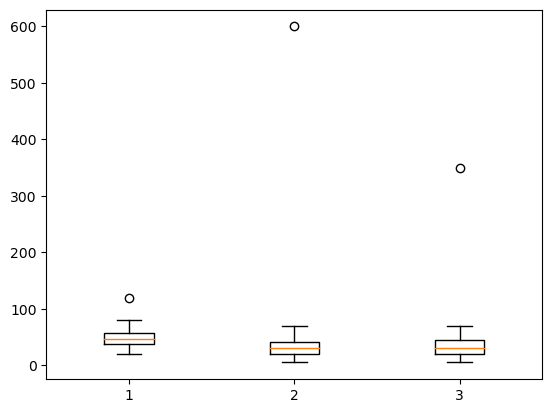

In [18]:
# plt.boxplot([df['food_a'],df['food_b'],df['food_c']])
plt.boxplot(df[['food_a','food_b','food_c']])
plt.show()

In [19]:
df['food_a']

0      20
1      21
2      23
3      22
4      26
5     120
6      35
7      35
8      41
9      42
10     43
11     45
12     44
13     45
14     46
15     47
16     47
17     46
18     47
19     58
20     58
21     59
22     60
23     56
24     57
25     57
26     80
Name: food_a, dtype: int64

In [ ]:
lowerfence = []
upperfence = []
li = ['food_a','food_b','food_c']
for i in df :
    iqr =df[i].describe().loc['75%']-df[i].describe().loc['25%']
    lowerfence.append(df[i].describe().loc['25%'] - iqr * 1.5)
    upperfence.append(df[i].describe().loc['75%'] + iqr * 1.5)
    
print('\n----------------------')
print(lowerfence, '최저 이상치')

print(upperfence, '최고 이상치')

#     lowerfence[i] = df[i](q1- iqr * 1.5)
#     upperfence[i] = df[i](q3 + iqr * 1.5)

In [ ]:
cnt = 0
for i in df.columns :

    print(i, "이상치",end="")
    print("\n--------")
    print(df[(df[i]<lowerfence[cnt]) | (df[i]> upperfence[cnt])])
    print('===================================\n')
    cnt += 1

In [ ]:
dd = df['food_b'][(df['food_b']<lowerfence[1]) | (df['food_b']>upperfence[1])]
print(dd.index[0])
dd.loc[ dd.index[0] ]

In [ ]:
df

In [ ]:
count = 0
for column in df.columns:
    s = df[column][(df[column]<lowerfence[count]) | (df[column]> upperfence[count])]
    df.drop(s.index[0], inplace=True)
    count = count + 1

In [ ]:
plt.boxplot(df[['food_a','food_b','food_c']])
plt.show()

In [ ]:
df = pd.read_csv('data/food.csv')
df.shape

In [ ]:
count = 0
for column in df.columns:
    df[column][(df[column]<lowerfence[count]) | (df[column]> upperfence[count])] = df[column].describe().loc['50%']
    count = count + 1

In [ ]:
df = pd.read_csv('data/food.csv')
count = 0
for column in df.columns:
    df[column][(df[column]<lowerfence[count]) | (df[column]> upperfence[count])] = round(df[column].mean())
    count = count + 1
df

In [ ]:
df = pd.read_csv('data/food.csv')

In [ ]:
for i in df.columns :
    print(i, "최빈값")
    print(df[i].mode())
    print('===============\n')

In [ ]:
df = pd.read_csv('data/food.csv')
count = 0
for column in df.columns:
    df[column][(df[column]<lowerfence[count]) | (df[column]> upperfence[count])] = df[column].mode()[0]
    count = count + 1
df